# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Plot train / test data
_, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].scatter(X[:,0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired) #scatter: puntos, Primera caracteristica, Y para las clases y se dividira entre 3 en este caso, edgecolors borde a los puntos, Cmap= Mapa de  colores
axes[1].scatter(X_train[:,0], X_train[:, 1], c='r', edgecolors="k") #Poner los puntos de entrenamiento y un marco negro
axes[1].scatter(X_test[:,0], X_test[:, 1], c='b', edgecolors="k") #Poner los puntos de testeo y borde negro


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''
%cd /content/drive/MyDrive/ML
from utils import plot_decision_boundary

In [ ]:
models = [LogisticRegression(), kNN(), SVC()]

names = ["Logistic Regression", "kNN", "SVC"]

_, axes = plt.subplots(1,3, figsize = (20,5))
preds = {} ##Prediccin

# fit the models
for clf, name, ax in zip(models, names, axes) :
  clf.fit(X_train, y_train)
  preds[name] = clf.predict(X_test)
  plot_decision_boundary(clf, X_test, y_test, n_points = 100, ax = ax)
  ax.set_title(name)

    # Plot everything

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
_, axes = plt.subplots(1, 3, figsize= (21,4))
#Compute metrics I plot confusion matrix
for name, ax in zip(names, axes):
  print ("########----- Results for {0} ---########".format(_))
  accuracy = accuracy_score(y_test, preds [name])
  precision = precision_score(y_test, preds [name], average = "micro")
  recall = recall_score(y_test, preds[name], average = "micro")
  f1 = f1_score(y_test, preds [name], average = "micro")
  cm = confusion_matrix(y_test, preds[name] )
  print("-- Acc --\t -- Prec --\t Rec-\t -- F1 --")
  print(" {0:.3f} \t {1:.3f} \t {2:.3f} \t {3:.3f} \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title(name)

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


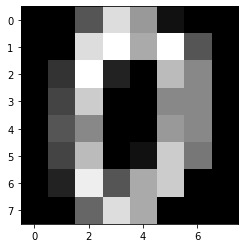

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[9].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 10 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
print (X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Plot train / test data
_,axes= plt.subplots (1,2, figsize = (10,5))
axes[0].scatter(X, y, c='g', edgecolors = 'k', cmap = 'Paired')
axes[1].scatter(X_train, y_train, c = 'r', edgecolors = 'k')
axes[1].scatter(X_test, y_test, c= 'b', edgecolors = 'k')

In [ ]:
# Train a linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE
# Compute MAE and MSE
preditions = linear_regression.predict(X_test)
mae=mean_absolute_error(y_test, preditions)
mse=mean_squared_error(y_test, preditions)
print("MAE: {0:.2f}".format(mae))
print("MSE: {0:.2f}".format(mse))